In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model, Model
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
TEST_DIR = './data/dogs-vs-cats-small/test'

In [3]:
model = load_model('./4_simple_model_with_data_augmentation.h5')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_______________________________________

img_data.shape = (1, 150, 150, 3)


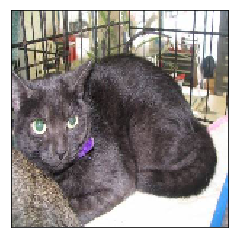

In [4]:
img_dir = os.path.join(TEST_DIR, 'cats')
img_path = os.path.join(img_dir, os.listdir(img_dir)[-1])
img = image.load_img(img_path, target_size=(150, 150))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data /= 255.
print("img_data.shape = {}".format(img_data.shape))

plt.figure()
plt.imshow(img_data[0])
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
__________

In [0]:
activations = activation_model.predict(img_data)
layer_names = [layer.name for layer in model.layers[:8]]

activation_1.shape = (1, 148, 148, 32)


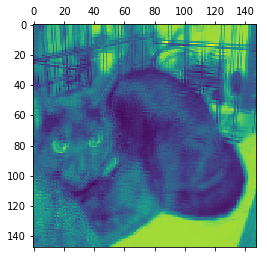

In [7]:
activation_1 = activations[0]
print("activation_1.shape = {}".format(activation_1.shape))

plt.matshow(activation_1[0, :, :, 1])
plt.show()

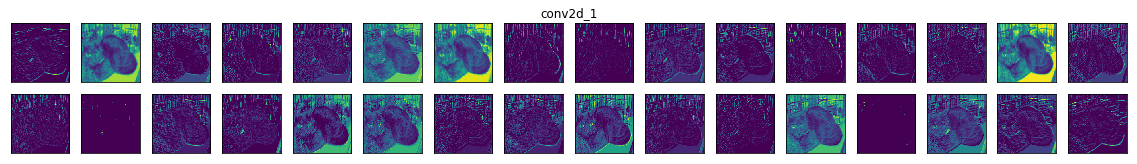

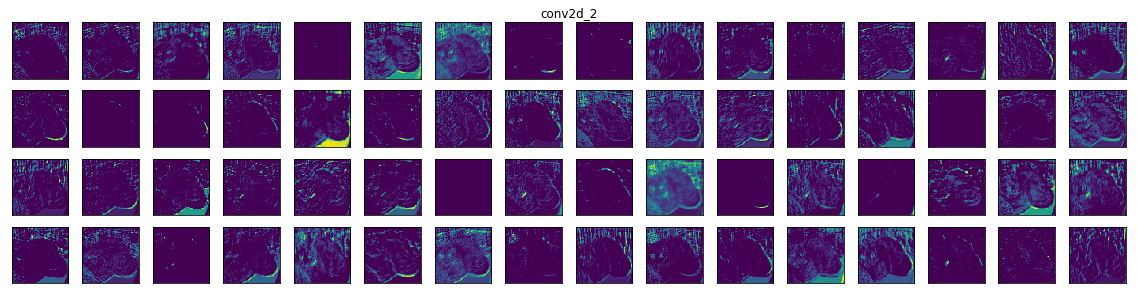

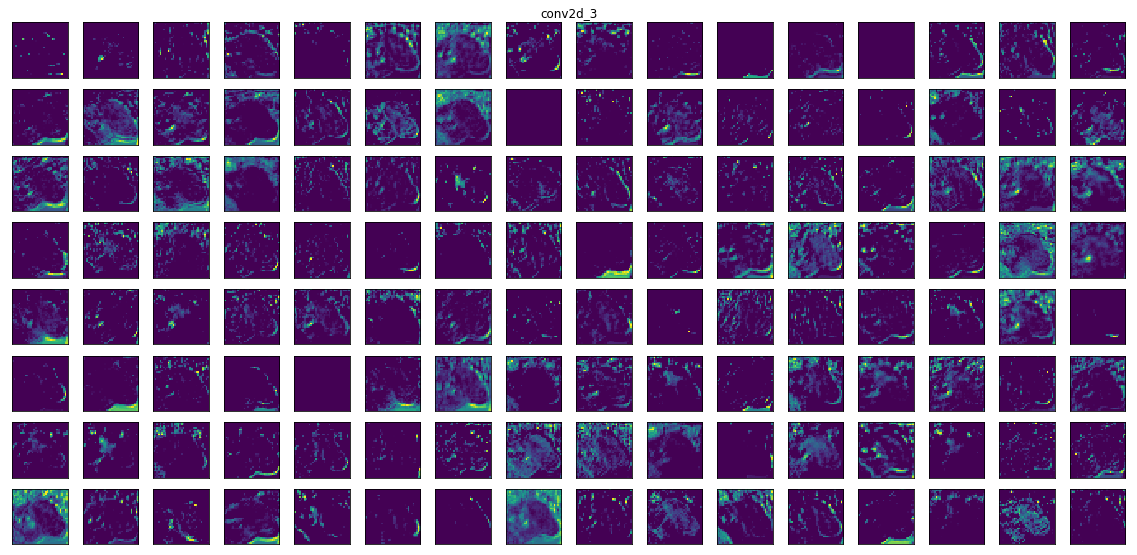

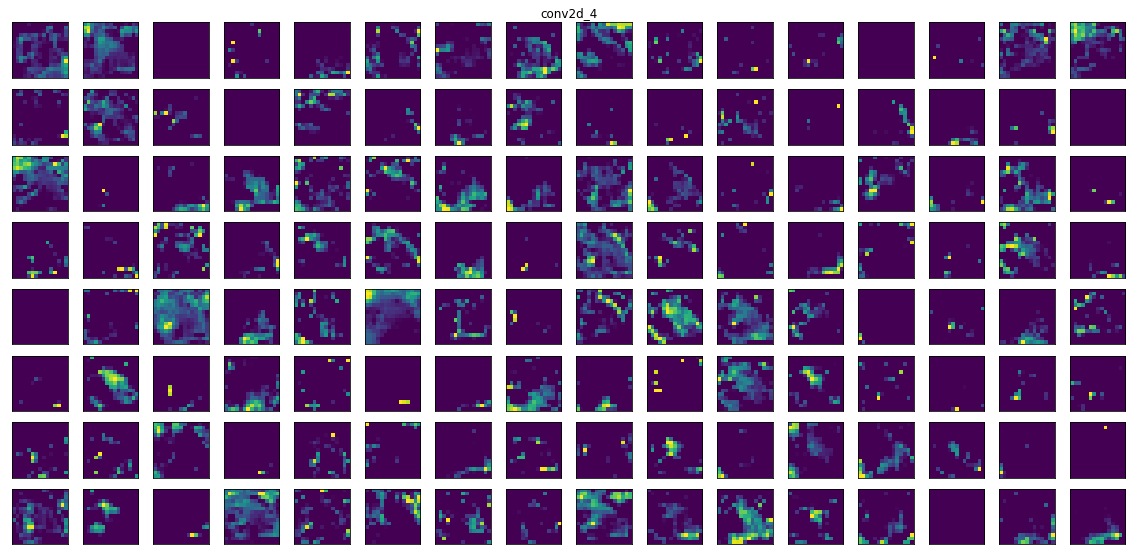

In [16]:
n_cols = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if not layer_name.startswith('conv2d'):
        continue;
    n_rows = layer_activation.shape[-1] // n_cols
    fig = plt.figure(figsize=(20, n_rows*1.2))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(layer_name)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    for row in range(n_rows):
        for col in range(n_cols):
            channel = row * n_cols + col
            ax = fig.add_subplot(n_rows, n_cols, channel + 1)          
            ax.imshow(layer_activation[0, :, :, channel])
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()